In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [8]:
random_data = np.random.random((20,2))

In [9]:
random_data

array([[0.62472535, 0.47455509],
       [0.89845834, 0.90600302],
       [0.39021871, 0.29508983],
       [0.71275132, 0.62437011],
       [0.76409228, 0.86426962],
       [0.78706132, 0.59703007],
       [0.23003151, 0.57138134],
       [0.58551703, 0.71150335],
       [0.33825371, 0.30049468],
       [0.99632874, 0.14253888],
       [0.35516031, 0.89623348],
       [0.49976769, 0.19494384],
       [0.65396666, 0.22658946],
       [0.46164596, 0.6002208 ],
       [0.7515091 , 0.49917388],
       [0.41089818, 0.48936215],
       [0.24431185, 0.99083215],
       [0.79467494, 0.46609457],
       [0.07154683, 0.98774748],
       [0.95769758, 0.81903502]])

In [14]:
X = random_data[:,0]

In [15]:
X

array([0.62472535, 0.89845834, 0.39021871, 0.71275132, 0.76409228,
       0.78706132, 0.23003151, 0.58551703, 0.33825371, 0.99632874,
       0.35516031, 0.49976769, 0.65396666, 0.46164596, 0.7515091 ,
       0.41089818, 0.24431185, 0.79467494, 0.07154683, 0.95769758])

In [16]:
y = random_data[:,1]

In [17]:
y

array([0.47455509, 0.90600302, 0.29508983, 0.62437011, 0.86426962,
       0.59703007, 0.57138134, 0.71150335, 0.30049468, 0.14253888,
       0.89623348, 0.19494384, 0.22658946, 0.6002208 , 0.49917388,
       0.48936215, 0.99083215, 0.46609457, 0.98774748, 0.81903502])

In [22]:
import random

In [23]:
def assuming_function(x):
    return 13.4*x + 5 + random.randint(-10,10)

In [24]:
y = [assuming_function(x) for x in X]

In [25]:
y

[23.371319733066123,
 9.039341727961592,
 3.2289307394878772,
 23.550867731865814,
 15.238836514602733,
 8.546621728376074,
 12.082422298013633,
 4.845928174826952,
 -0.46740027628134584,
 17.35080509158294,
 1.7591481465775196,
 17.696887001504948,
 22.763153186212907,
 3.1860559259055528,
 23.07022197063292,
 8.506035586560067,
 13.273778743945146,
 22.648644173136802,
 7.958727585107052,
 11.833147581124237]

<IPython.core.display.Javascript object>


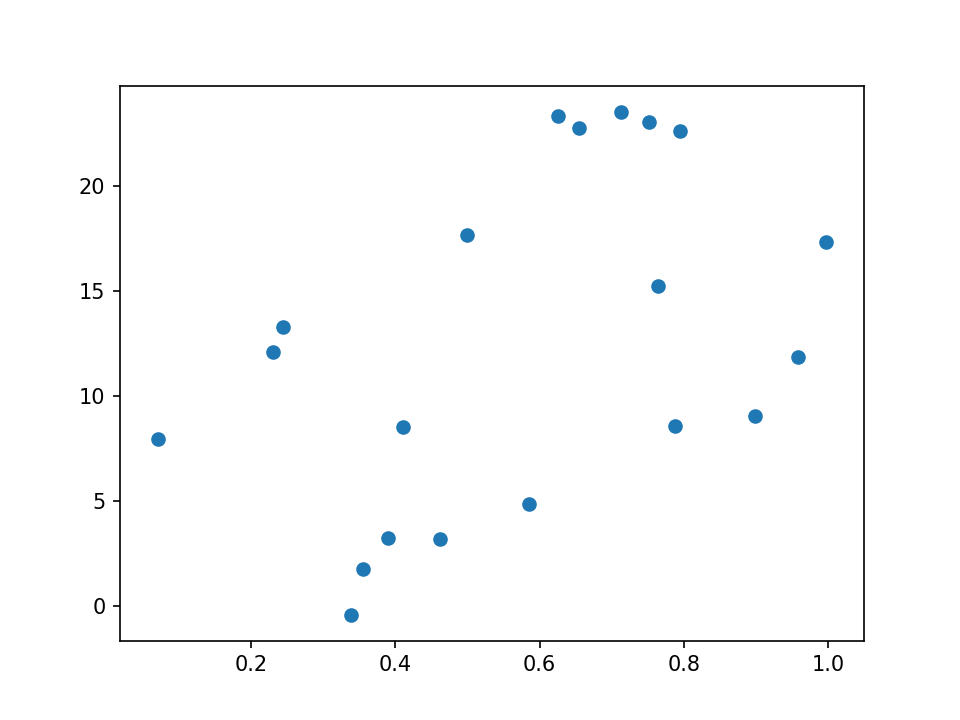

In [27]:
plt.scatter(X,y)

In [28]:
y = np.array(y)

In [29]:
y

array([23.37131973,  9.03934173,  3.22893074, 23.55086773, 15.23883651,
        8.54662173, 12.0824223 ,  4.84592817, -0.46740028, 17.35080509,
        1.75914815, 17.696887  , 22.76315319,  3.18605593, 23.07022197,
        8.50603559, 13.27377874, 22.64864417,  7.95872759, 11.83314758])

# Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [35]:
reg.score(X.reshape(-1,1),y)

0.20792695637730674

In [36]:
reg.coef_

array([13.94121805])

In [39]:
reg.intercept_

4.43802520961434

In [40]:
def f(x):
    return reg.coef_*x + reg.intercept_

<IPython.core.display.Javascript object>


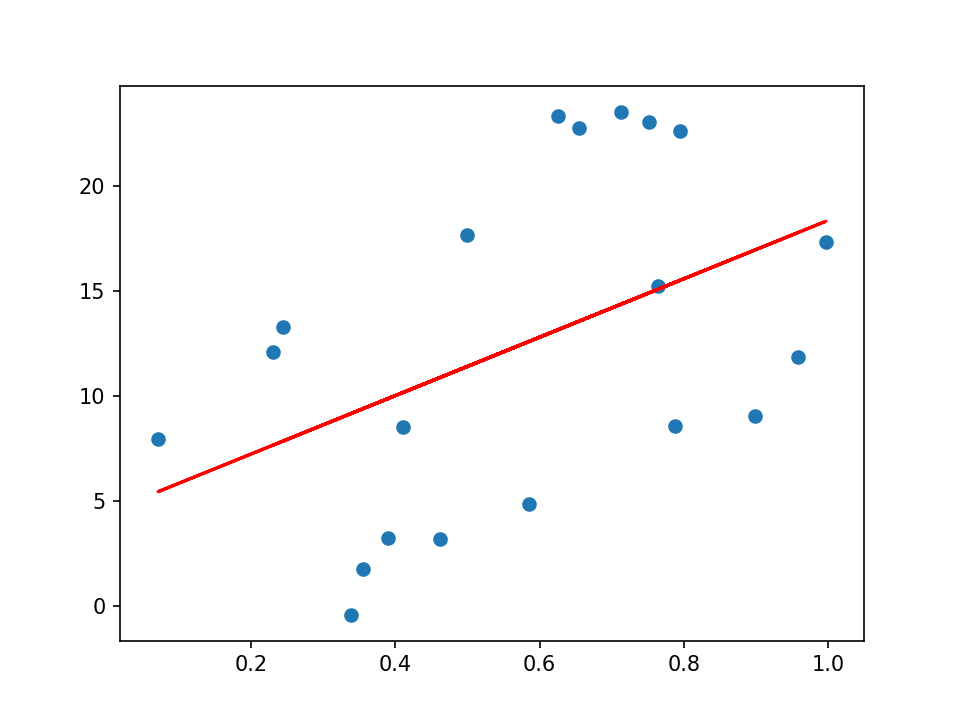

In [41]:
plt.scatter(X,y)
plt.plot(X,f(X),color = 'red')

In [56]:
reg.predict(np.array(0.6).reshape(1,-1))

array([12.80275604])

# KNN

In [57]:
def model(X,y):
    return((Xi,yi) for Xi,yi in zip(X,y))

In [58]:
from scipy.spatial.distance import cosine

In [59]:
def distance(x1,x2):
    return cosine(x1,x2)

In [72]:
def predict(x,k=5):
    most_simmilar = sorted(model(X,y), key = lambda xi: distance(xi[0],x))[:k]
    y_hat = [_y for x,_y in most_simmilar]
    
    print(most_simmilar)
    return np.mean(y_hat)

In [73]:
X,y

(array([0.62472535, 0.89845834, 0.39021871, 0.71275132, 0.76409228,
        0.78706132, 0.23003151, 0.58551703, 0.33825371, 0.99632874,
        0.35516031, 0.49976769, 0.65396666, 0.46164596, 0.7515091 ,
        0.41089818, 0.24431185, 0.79467494, 0.07154683, 0.95769758]),
 array([23.37131973,  9.03934173,  3.22893074, 23.55086773, 15.23883651,
         8.54662173, 12.0824223 ,  4.84592817, -0.46740028, 17.35080509,
         1.75914815, 17.696887  , 22.76315319,  3.18605593, 23.07022197,
         8.50603559, 13.27377874, 22.64864417,  7.95872759, 11.83314758]))

In [74]:
predict(0.9)

[(0.7640922772091592, 15.238836514602733), (0.35516030944608346, 1.7591481465775196), (0.6247253532138899, 23.371319733066123), (0.39021871190208035, 3.2289307394878772), (0.7127513232735682, 23.550867731865814)]


13.429820573120015

# Dicesion Tree

In [76]:
from collections import Counter
from icecream import ic

In [78]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c]/len(elements) for c in set(elements)]
    ic(probs)
    return -sum(p*np.log(p) for p in probs)

In [79]:
entropy([1,0,0,0])

ic| probs: [0.75, 0.25]


0.5623351446188083

In [80]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [81]:
import pandas as pd

In [82]:
dataset = pd.DataFrame.from_dict(mock_data)

In [83]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [85]:
#split by gender
print(entropy([1,1,1,0]) + entropy([0,0,1]))

#split by income
print(entropy([1,1,0,0,0]) + entropy([1,1]))

#split by family_number
print(entropy([1,1,0,0,0]) + entropy([1,1]))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565


In [87]:
set(dataset['family_number'])

{1, 2}

In [88]:
set(dataset['income'])

{'+10', '-10'}

In [89]:
set(dataset['gender'])

{'F', 'M'}

In [90]:
sub_split_1 = dataset[dataset['family_number'] ==1]

In [91]:
sub_split_1

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [117]:
sub_split_2 = sub_split_1[sub_split_1['gender'] == 'F']

In [118]:
sub_split_2_ = sub_split_1[sub_split_1['gender'] != 'F']

In [120]:
sub_split_2['bought'].tolist()

[1, 1, 0]

In [121]:
sub_split_2_['bought'].tolist()

[0, 0]

In [122]:
entropy(sub_split_2['bought'].tolist())+entropy(sub_split_2_['bought'].tolist())

ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]


0.6365141682948128

In [123]:
sub_split_3 = sub_split_1[sub_split_1['income'] == '+10']

In [124]:
sub_split_3_ = sub_split_1[sub_split_1['income'] != '+10']

In [125]:
sub_split_3['bought'].tolist()

[1, 0, 0, 0]

In [126]:
sub_split_3_['bought'].tolist()

[1]

In [127]:
entropy(sub_split_3['bought'].tolist()) + entropy(sub_split_3_['bought'].tolist())

ic| probs: [0.75, 0.25]
ic| probs: [1.0]


0.5623351446188083

In [135]:
sub_split_3

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [128]:
sub_split_4 = sub_split_3[sub_split_3['gender'] == 'F']

In [129]:
sub_split_4['bought'].tolist()

[1, 0]

In [136]:
sub_split_4_ = sub_split_3[sub_split_3['gender'] !='F']

In [137]:
sub_split_4_['bought'].tolist()

[0, 0]

In [139]:
entropy(sub_split_4['bought'].tolist()) + entropy(sub_split_4_['bought'].tolist())

ic| probs: [0.5, 0.5]
ic| probs: [1.0]


0.6931471805599453

In [1]:
def find_the_optimal_spliter(traning_data: pd.DataFrame, target: str):
    x_fields = set(traning_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(traning_data[f])
        ic(values)
        for v in values:
            sub_split_1 = traning_data[traning_data[f] == v][target].tolist()
            ic(sub_split_1)
            
            entropy_1 = entropy(sub_split_1)
            ic(entropy_1)
            
            sub_split_2 = traning_data[traning_data[f] !=v][target].tolist()
            ic(sub_split_2)
            
            entropy_2 = entropy(sub_split_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
    print('spliter is :{}'.format(spliter))
    print('the min entropy is :{}'.format(min_entropy))
    
    return spliter

NameError: name 'pd' is not defined

In [149]:
find_the_optimal_spliter(traning_data = dataset, target = 'bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| pro

spliter is :
the min entropy is :


('income', '-10')

# Kmeans

In [150]:
from sklearn.cluster import KMeans

In [159]:
X1 = [random.randint(0,100) for x in range(100)]
X2 = [random.randint(0,100) for x in range(100)]

<IPython.core.display.Javascript object>


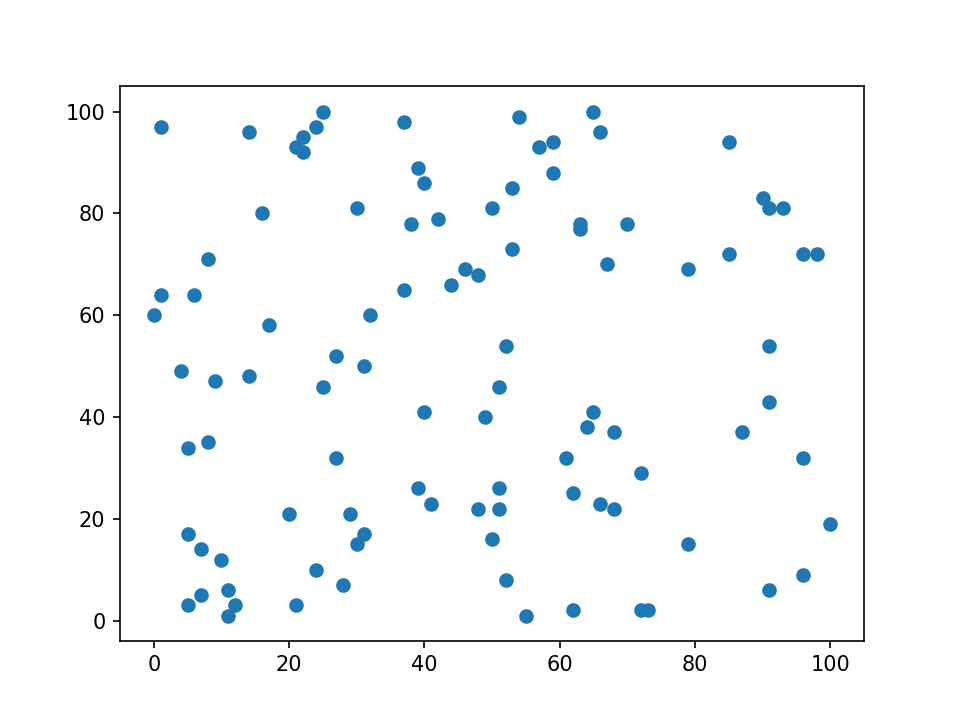

In [160]:
plt.scatter(X1,X2)

In [162]:
traning_data = [[x1,x2] for x1,x2 in zip(X1,X2)]

In [164]:
cluster = KMeans(n_clusters = 6, max_iter = 500)

In [165]:
cluster.fit(traning_data,)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [173]:
cluster.cluster_centers_

array([[56.16666667, 80.44444444],
       [19.88888889, 13.11111111],
       [68.46153846, 22.88461538],
       [89.77777778, 75.33333333],
       [25.30769231, 90.92307692],
       [16.5       , 52.75      ]])

In [179]:
cluster.labels_

array([3, 1, 4, 0, 1, 1, 3, 2, 2, 1, 0, 0, 2, 5, 5, 2, 0, 2, 4, 5, 5, 1,
       5, 5, 1, 3, 1, 1, 2, 2, 4, 1, 2, 0, 2, 2, 1, 2, 1, 2, 4, 5, 4, 0,
       3, 5, 1, 1, 4, 1, 3, 1, 5, 1, 2, 5, 1, 1, 2, 5, 4, 0, 2, 0, 0, 5,
       3, 0, 2, 4, 0, 2, 2, 2, 2, 5, 5, 2, 3, 0, 2, 0, 4, 3, 4, 5, 4, 2,
       4, 2, 0, 5, 2, 0, 0, 4, 3, 0, 0, 2])

In [181]:
from collections import defaultdict

In [182]:
centers = defaultdict(list)

In [187]:
for label, location in zip(cluster.labels_, traning_data):
    centers[label].append(location)

<IPython.core.display.Javascript object>


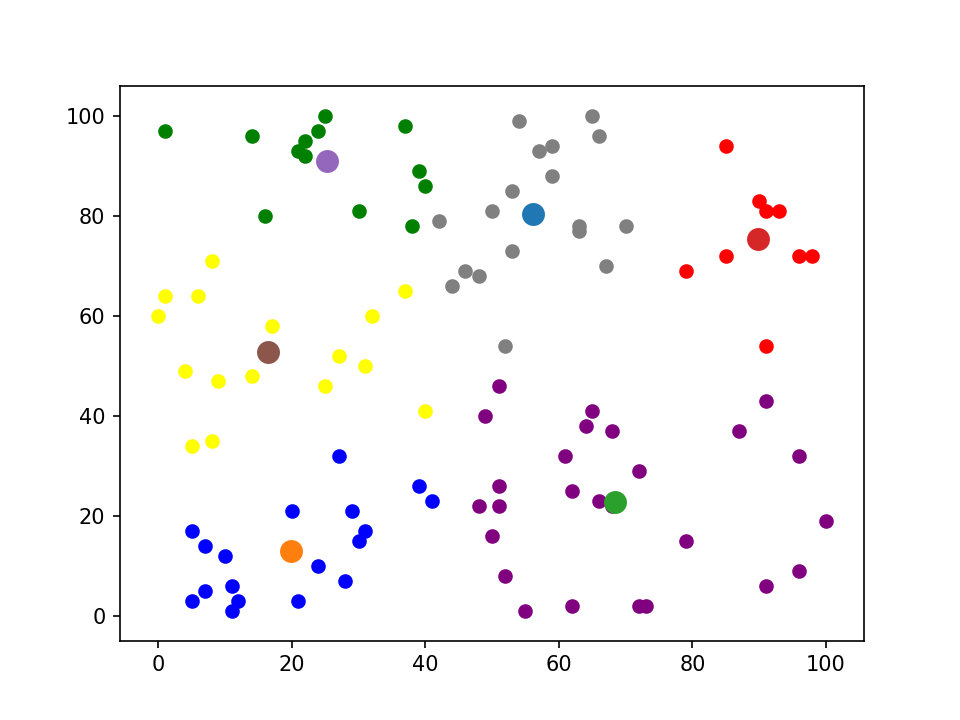

In [202]:
color = ['red', 'blue', 'green', 'grey', 'purple', 'yellow']

for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c = color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)